In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df=pd.read_csv("clead_google_playstore_data.csv")

In [4]:
df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8,6,2018


In [5]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
658,Soul Mate,DATING,NaN,0,4400.0,10,Free,0.00,Mature 17+,Dating,2018-07-19,4.5.0,4.0.3,19,7,2018
5380,Vikings: an Archer's Journey,GAME,4.5,10256,39000.0,1000000,Free,0.00,Everyone,Action,2017-12-11,2.1.0,4.3,11,12,2017
4990,"AE + Aerie: Jeans, Dresses, Swimsuits & Bralettes",SHOPPING,4.2,20476,28000.0,1000000,Free,0.00,Everyone,Shopping,2018-07-17,5.6.0,4.4,17,7,2018
5386,League of Gamers - Be an E-Sports Legend!,SPORTS,4.5,68072,40000.0,5000000,Free,0.00,Everyone,Sports,2018-07-26,1.1.7,4.1,26,7,2018
10030,Bike Race - Bike Blast Rush,GAME,4.4,83891,48000.0,10000000,Free,0.00,Everyone,Action,2018-07-19,3.1,4.0,19,7,2018
280,Accounting App - Zoho Books,BUSINESS,4.5,3079,8500.0,100000,Free,0.00,Everyone,Business,2018-08-02,5.20.7,4.1,2,8,2018
7107,CB Frequencies,TOOLS,4.0,5,1400.0,100,Paid,0.99,Everyone,Tools,2015-12-24,1.0,4.0.3,24,12,2015
3830,Yandex.Transport,MAPS_AND_NAVIGATION,4.0,126282,NaN,10000000,Free,0.00,Everyone,Maps & Navigation,2018-07-30,5.7,4.1,30,7,2018
6601,bp e-store,BOOKS_AND_REFERENCE,4.4,52,2200.0,1000,Free,0.00,Everyone,Books & Reference,2016-01-15,2.0.7,4.0,15,1,2016
3235,Google Translate,TOOLS,4.4,5745093,NaN,500000000,Free,0.00,Everyone,Tools,2018-08-04,Varies with device,NaN,4,8,2018


In [6]:
df.shape

(10840, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     9476 non-null   object 
 13  day             10840 non-null  int64  
 14  month           10840 non-null  int64  
 15  year            10840 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757e+00,5.152189e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,10840.0,4.441529e+05,2.927761e+06,0.0,38.0,2094.0,54775.5,7.815831e+07
Size,9145.0,2.150653e+04,2.259602e+04,10.0,4900.0,13000.0,30000.0,1.000000e+05
Installs,10840.0,1.546434e+07,8.502936e+07,0.0,1000.0,100000.0,5000000.0,1.000000e+09
Price,10840.0,1.027368e+00,1.594970e+01,0.0,0.0,0.0,0.0,4.000000e+02
day,10840.0,1.560904e+01,9.561621e+00,1.0,6.0,16.0,24.0,3.100000e+01
month,10840.0,6.422325e+00,2.578388e+00,1.0,5.0,7.0,8.0,1.200000e+01
year,10840.0,2.017400e+03,1.100914e+00,2010.0,2017.0,2018.0,2018.0,2.018000e+03


In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


In [10]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'day', 'month', 'year'],
      dtype='object')

In [11]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,NaN,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,NaN,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,NaN,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,NaN,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0,1,6,2018


In [12]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,NaN,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10714,FarmersOnly Dating,DATING,3.0,1145,1400.0,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0,25,2,2016
10719,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0,6,7,2018
10729,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4,24,3,2018
10752,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4,30,7,2018


In [13]:
df=df.drop_duplicates(subset=['App'],keep='first')

In [14]:
df.shape

(9659, 16)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     8667 non-null   object 
 13  day             9659 non-null   int64  
 14  month           9659 non-null   int64  
 15  year            9659 non-null   int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


In [16]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O'] ##Collecting numeric features

In [17]:
numeric_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month', 'year']

In [18]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [19]:
categorical_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [20]:
df["Type"].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

In [21]:
df["Type"].value_counts(normalize=True)*100

Free    92.172292
Paid     7.827708
Name: Type, dtype: float64

In [22]:
for col in categorical_features:
    print(f"{col}:{df[col].value_counts(normalize=True)*100}")
    print("===============================")

App:Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64
Category:FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE                 3.571798
S

<AxesSubplot:xlabel='Type', ylabel='count'>

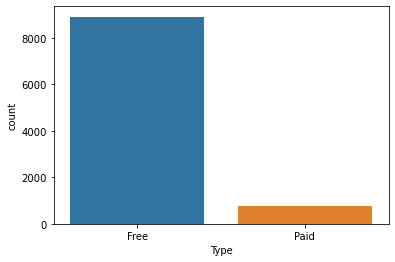

In [23]:
sns.countplot(x=df["Type"])

<AxesSubplot:xlabel='Content Rating', ylabel='count'>

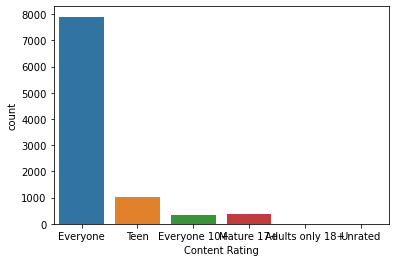

In [24]:
sns.countplot(x=df['Content Rating'])

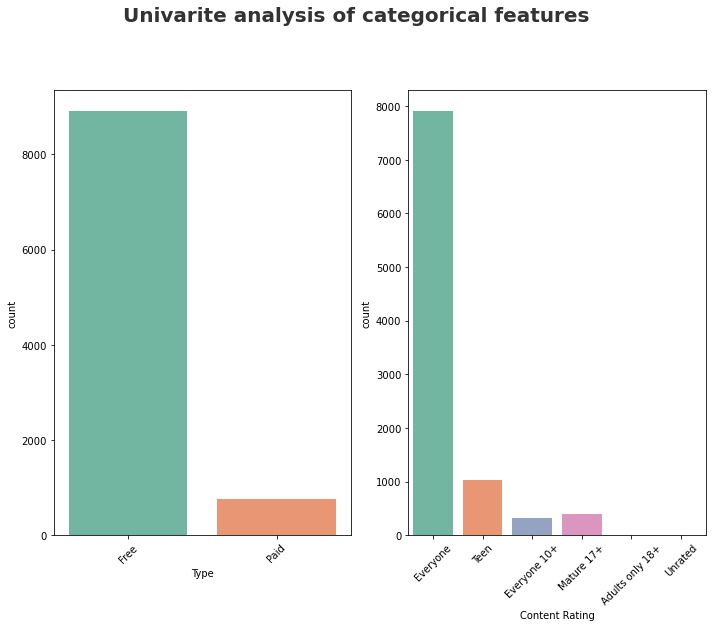

In [25]:
#Categorical columns
plt.figure(figsize=(10,15))
plt.suptitle('Univarite analysis of categorical features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
category=['Type','Content Rating']
for i in range(len(category)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=df[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 0.96])

In [26]:
numeric_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month', 'year']

<AxesSubplot:xlabel='Price', ylabel='Density'>

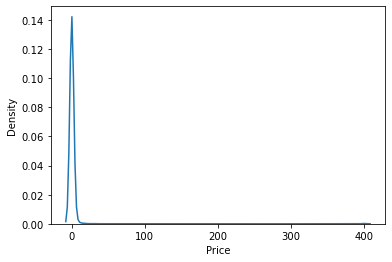

In [27]:
sns.kdeplot(df['Price'])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

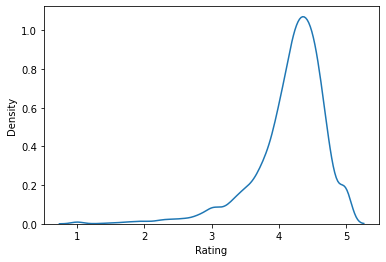

In [28]:
sns.kdeplot(df['Rating'])

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

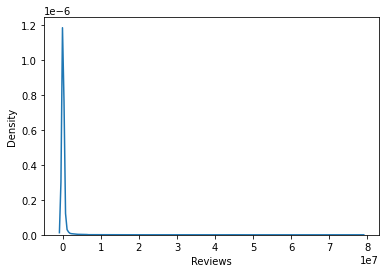

In [29]:
sns.kdeplot(df['Reviews'])

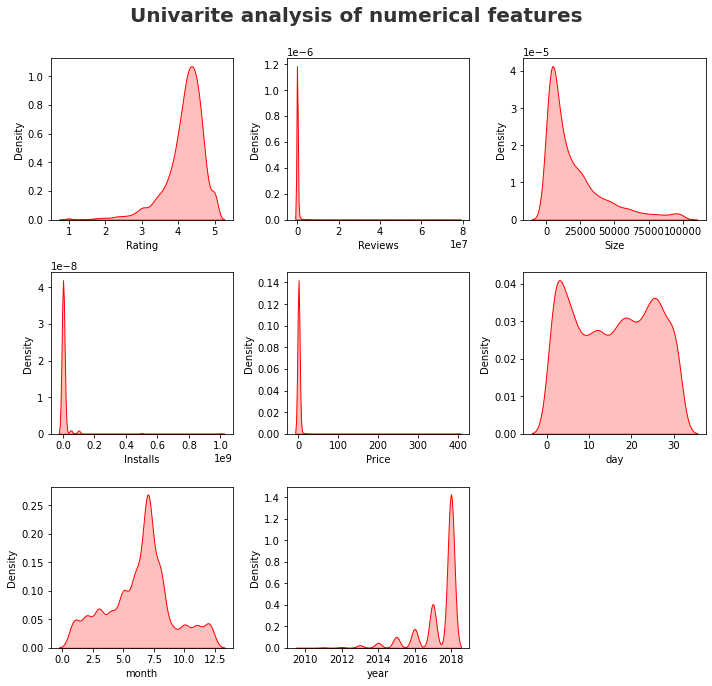

In [30]:
plt.figure(figsize=(10,15))
plt.suptitle('Univarite analysis of numerical features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numeric_features)):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color="r")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<AxesSubplot:xlabel='Rating', ylabel='Density'>

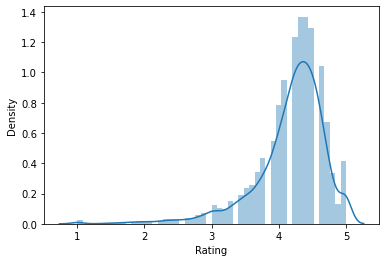

In [31]:
##distribution plot
sns.distplot(df['Rating'])

(array([  17.,   18.,   39.,   73.,  132.,  439.,  833., 1493., 3450.,
        1702.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

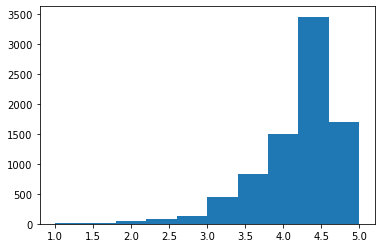

In [32]:
plt.hist(df['Rating'])

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


##Univariate Analysis
Finding most popular category

<AxesSubplot:ylabel='Category'>

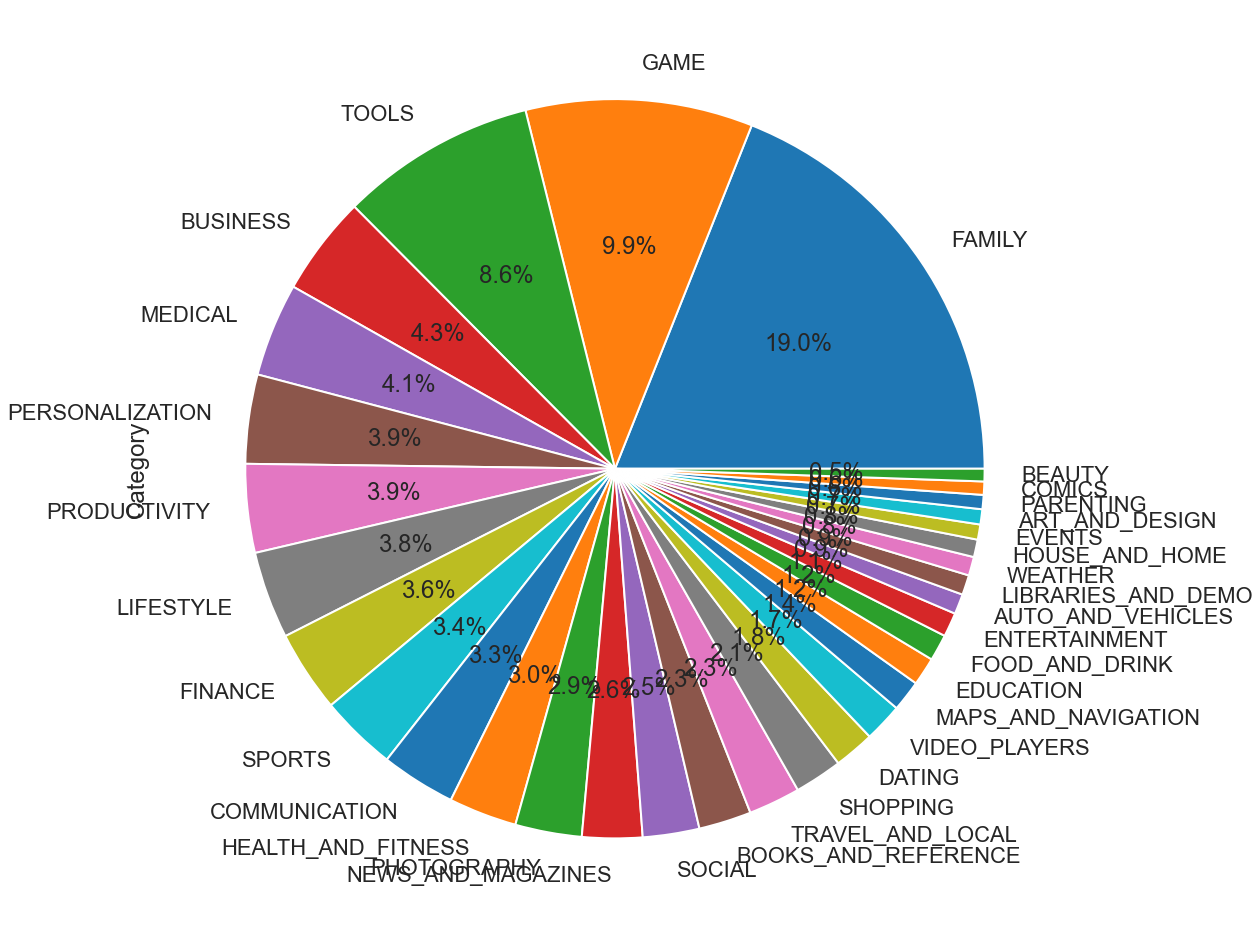

In [102]:
df["Category"].value_counts().plot.pie(y=df["Category"],figsize=(17,17),autopct='%1.1f%%')

In [35]:
##Top 10 category
df_cat=df['Category'].value_counts()[:10]

In [36]:
category = pd.DataFrame(df['Category'].value_counts()) #Dataframe of apps on category = pd.DataFrame(df['Category'].value_counts()) #Dataframe of apps onthe basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

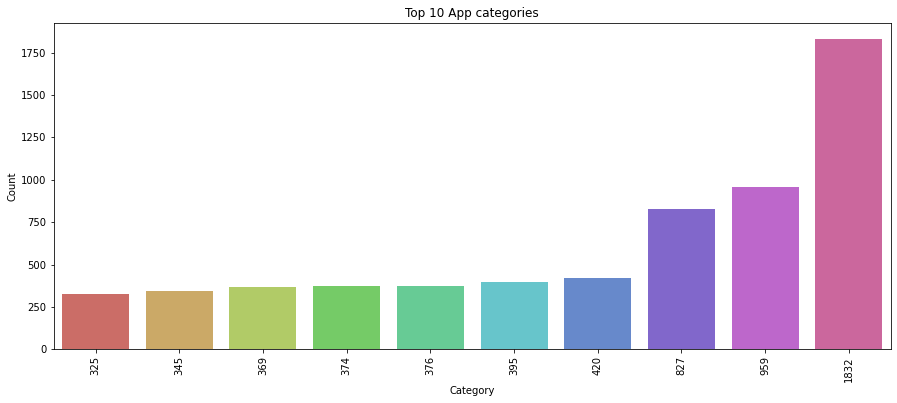

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_cat, y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

##### Finding which category having highest number of installation

In [38]:
df_cat_install=df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()

In [39]:
df2=df_cat_install.head(10)

In [40]:
df2

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


<AxesSubplot:xlabel='Installs', ylabel='Category'>

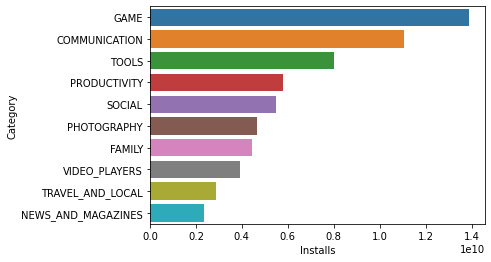

In [41]:
sns.barplot(x="Installs",y="Category",data=df2)

##Observation: Game is the most popular category and having higher number of installation

##### What are the most installed apps in each popular category

In [42]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


In [43]:
##Multivariate analysis
##We are dealing with three variables. Install, App and Category
dfa=df.groupby(['Category','App'])['Installs'].sum().reset_index()

In [44]:
dfa

,Category,App,Installs
0,ART_AND_DESIGN,350 Diy Room Decor Ideas,10000
1,ART_AND_DESIGN,3D Color Pixel by Number - Sandbox Art Coloring,100000
2,ART_AND_DESIGN,AJ Styles HD Wallpapers,5000
3,ART_AND_DESIGN,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,1000
4,ART_AND_DESIGN,Ai illustrator viewer,100000
...,...,...,...
9654,WEATHER,Yahoo Weather,10000000
9655,WEATHER,Yahoo! Weather for SH Forecast for understandi...,1000000
9656,WEATHER,Yandex.Weather,10000000
9657,WEATHER,weather - weather forecast,1000000


In [45]:
dfa=dfa.sort_values('Installs',ascending=False)

In [46]:
dfa[dfa.Category=='GAME'][:5]

,Category,App,Installs
4773,GAME,Subway Surfers,1000000000
4167,GAME,Candy Crush Saga,500000000
4628,GAME,Pou,500000000
4802,GAME,Temple Run 2,500000000
4580,GAME,My Talking Tom,500000000


In [47]:
##Most install apps with respect to productivity 
dfa[dfa.Category=='PRODUCTIVITY'][:5]

,Category,App,Installs
7427,PRODUCTIVITY,Google Drive,1000000000
7472,PRODUCTIVITY,Microsoft Word,500000000
7425,PRODUCTIVITY,Google Calendar,500000000
7364,PRODUCTIVITY,Dropbox,500000000
7334,PRODUCTIVITY,Cloud Print,500000000


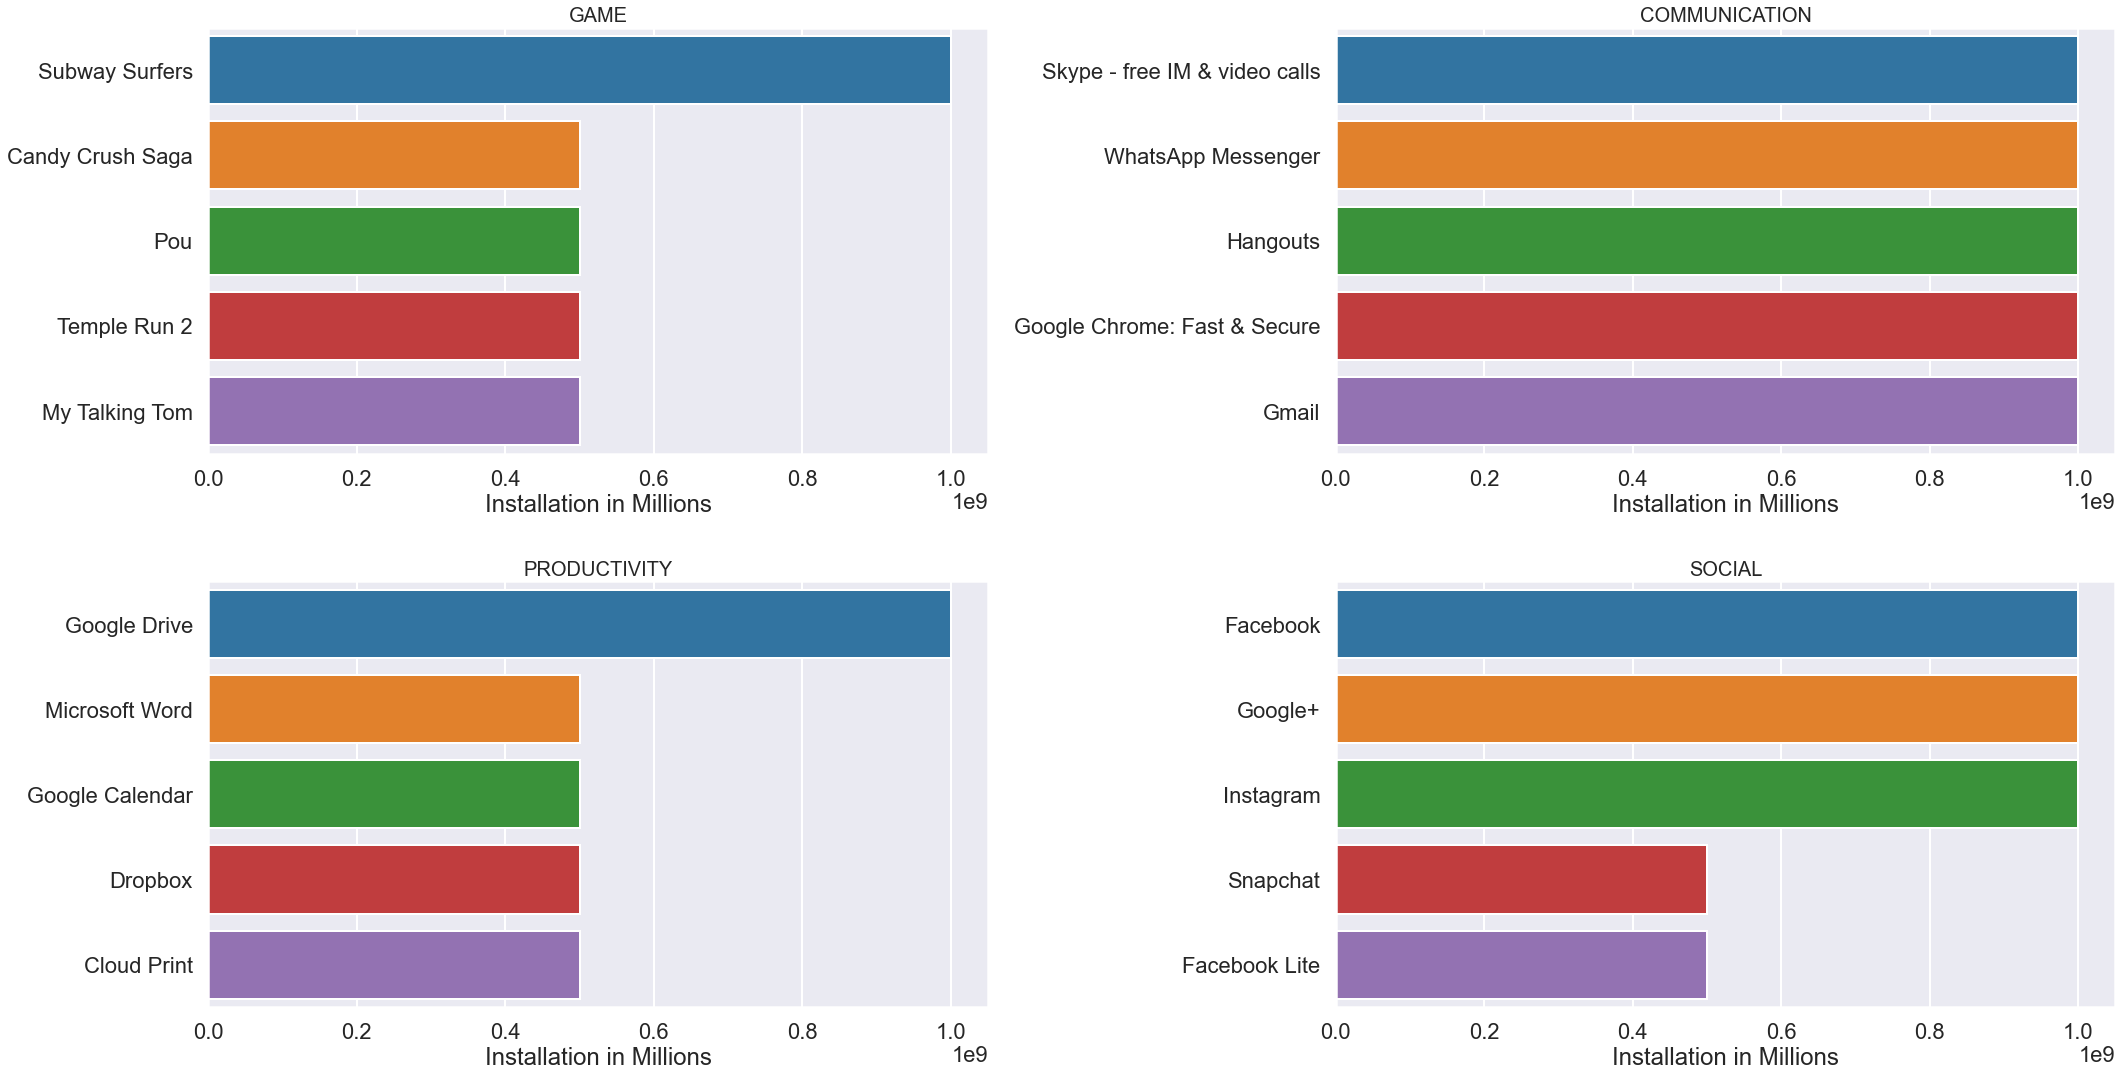

In [48]:
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize=(30,30))
for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

Each subplot displays the top 5 apps based on the number of installs within that category

##### Analysing the apps on Google play store which get 5 ratings

In [49]:
df_rating=df.groupby(['App'])['Rating'].sum().sort_values(ascending=False).reset_index()

In [127]:
df_rating

,App,Rating
0,Comunidad De Fe Minitries,5.0
1,Tablet Reminder,5.0
2,Noticias FC Barcelona,5.0
3,"Superheroes, Marvel, DC, Comics, TV, Movies News",5.0
4,DC N COMPANY ENTERTAINMENT RADIO!,5.0
...,...,...
9654,DK Childcare Centers,0.0
9655,Pediatric Emergency Guide,0.0
9656,Pekalongan CJ,0.0
9657,Penn State Health OnDemand,0.0


In [51]:
df_rating[df_rating.Rating==5.0]

,App,Rating
0,Comunidad De Fe Minitries,5.0
1,Tablet Reminder,5.0
2,Noticias FC Barcelona,5.0
3,"Superheroes, Marvel, DC, Comics, TV, Movies News",5.0
4,DC N COMPANY ENTERTAINMENT RADIO!,5.0
...,...,...
266,American Girls Mobile Numbers,5.0
267,daskal.eu,5.0
268,Free coupons and vouchers,5.0
269,Bk Usha behn,5.0


In [54]:
rating2=df.groupby(['Category','Installs','App'])['Rating'].sum().sort_values(ascending=False).reset_index()

In [55]:
rating2

,Category,Installs,App,Rating
0,FAMILY,1000,CS & IT Interview Questions,5.0
1,DATING,100,Online Girls Chat Group,5.0
2,FAMILY,10,Chronolink DX,5.0
3,DATING,500,Spine- The dating app,5.0
4,MEDICAL,5,Clinic Doctor EHr,5.0
...,...,...,...,...
9654,TOOLS,100,CG Wizard,0.0
9655,TOOLS,100,CG 3D Model Viewer: view 3D models interactively,0.0
9656,BUSINESS,100,CS,0.0
9657,TOOLS,100,CD View Lite,0.0


In [56]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'day', 'month', 'year'],
      dtype='object')

<AxesSubplot:xlabel='Price', ylabel='Category'>

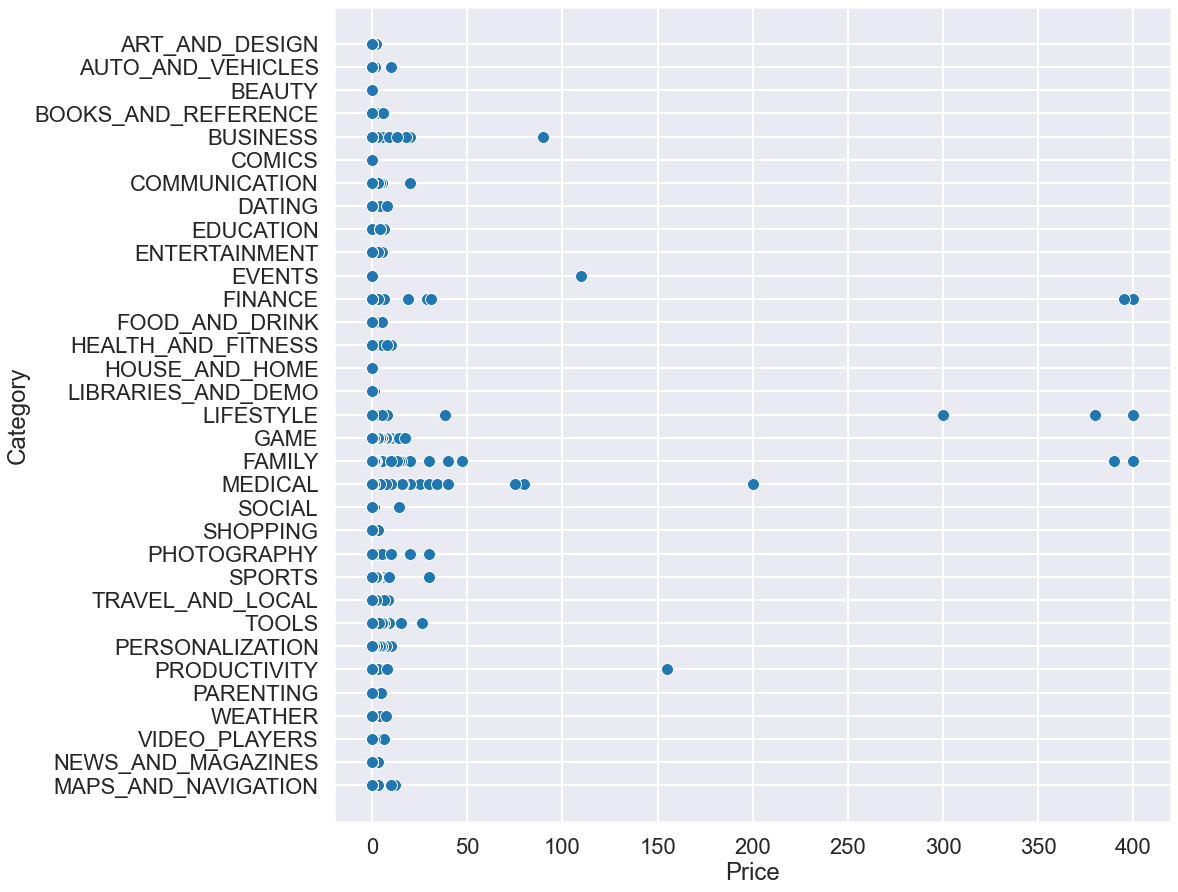

In [60]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df,x='Price',y='Category')

Observation:
Lifestyle, finance and family having higher price

##### Finding which category app users are reviewing the most

In [61]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'day', 'month', 'year'],
      dtype='object')

In [66]:
df.groupby(['App','Category'])['Reviews'].sum().sort_values(ascending=False).reset_index()

,App,Category,Reviews
0,Facebook,SOCIAL,78158306
1,WhatsApp Messenger,COMMUNICATION,69119316
2,Instagram,SOCIAL,66577313
3,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847
4,Clash of Clans,GAME,44891723
...,...,...,...
9654,Cypress College Library,BOOKS_AND_REFERENCE,0
9655,Cyborg AX-001,GAME,0
9656,Kiosque CD,TRAVEL_AND_LOCAL,0
9657,EP Cook Book,MEDICAL,0


In [69]:
df.groupby('Category').agg({'Installs':'sum','Reviews':'sum'}).reset_index()

,Category,Installs,Reviews
0,ART_AND_DESIGN,114338100,1419203
1,AUTO_AND_VEHICLES,53130211,1163666
2,BEAUTY,27197050,396240
3,BOOKS_AND_REFERENCE,1665969576,16721314
4,BUSINESS,697164865,9890245
5,COMICS,44981150,2342071
6,COMMUNICATION,11038276251,285811368
7,DATING,140926107,3623544
8,EDUCATION,352952000,13364148
9,ENTERTAINMENT,2113660000,34762650


In [70]:
df.groupby('Type').agg({"Installs":sum})

,Installs
Type,
Free,75065572646
Paid,57364881


<AxesSubplot:title={'center':'Percentage of Installs Number for Free App and Paid App'}, ylabel='Installs'>

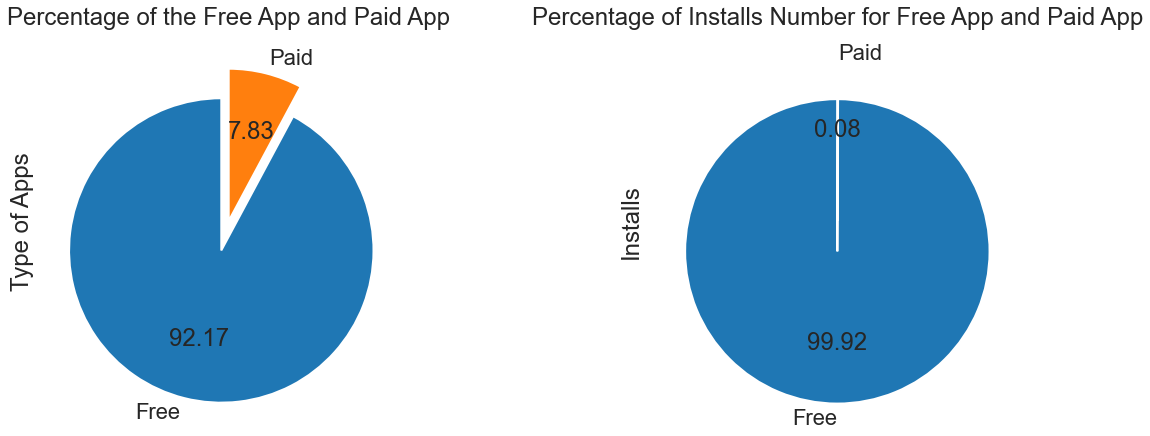

In [71]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
df.value_counts('Type').plot.pie(y='Type',startangle=90, explode=(0.2,0),
title='Percentage of the Free App and Paid App', legend=False, autopct='%.2f',
ax=ax[0])
ax[0].set(ylabel='Type of Apps')
df.groupby('Type').agg({'Installs':sum}).plot.pie(y='Installs', startangle=90,
explode=(0.2,0), title='Percentage of Installs Number for Free App and Paid App',
legend=False, autopct='%.2f', ax=ax[1])

Observation: The data shows that most users prefer Free apps, which make up 92.17% of all apps and 99.92% of installs. This means that users are much more likely to choose free options, so developers should find good ways to make money from these free apps.

In [72]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018


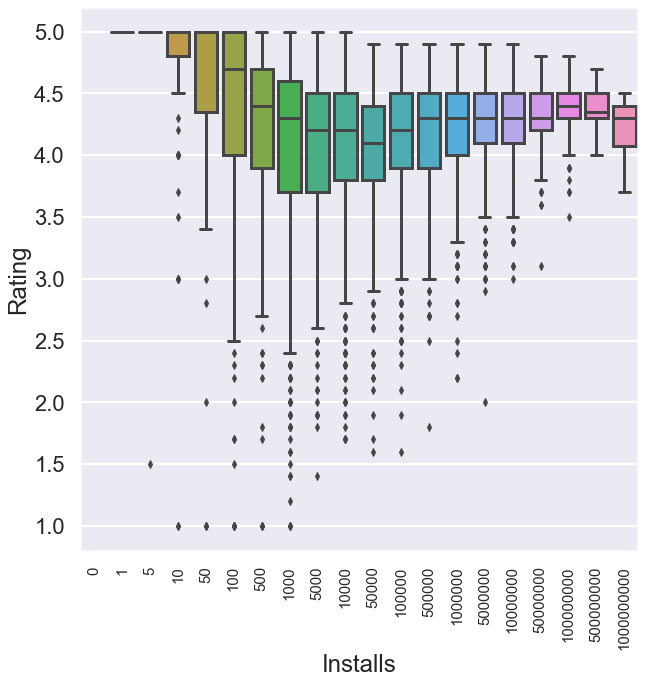

In [83]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Installs',y='Rating',data=df)
plt.xticks(size=15,rotation=90)
plt.show()

##Observation:
Highly installed apps having good rating and there is no outliers. 

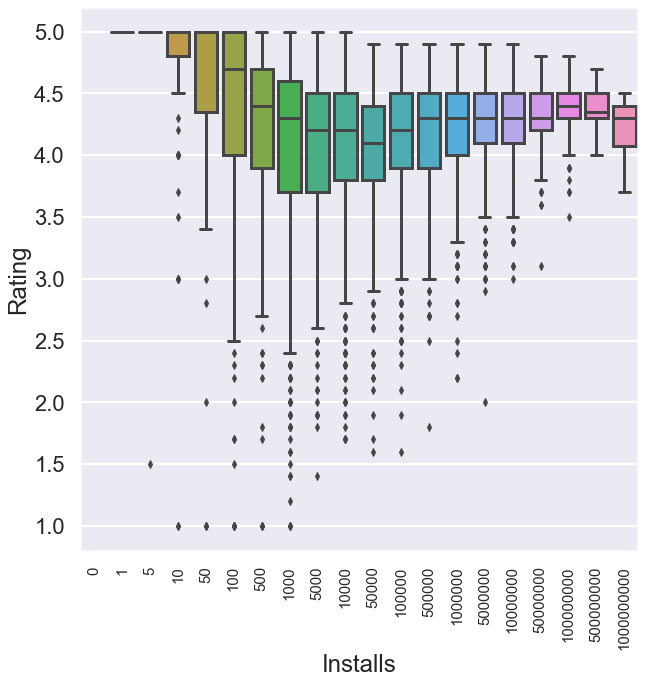

In [82]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Installs",y="Rating",data=df)
plt.xticks(size=15,rotation=90)
plt.show()

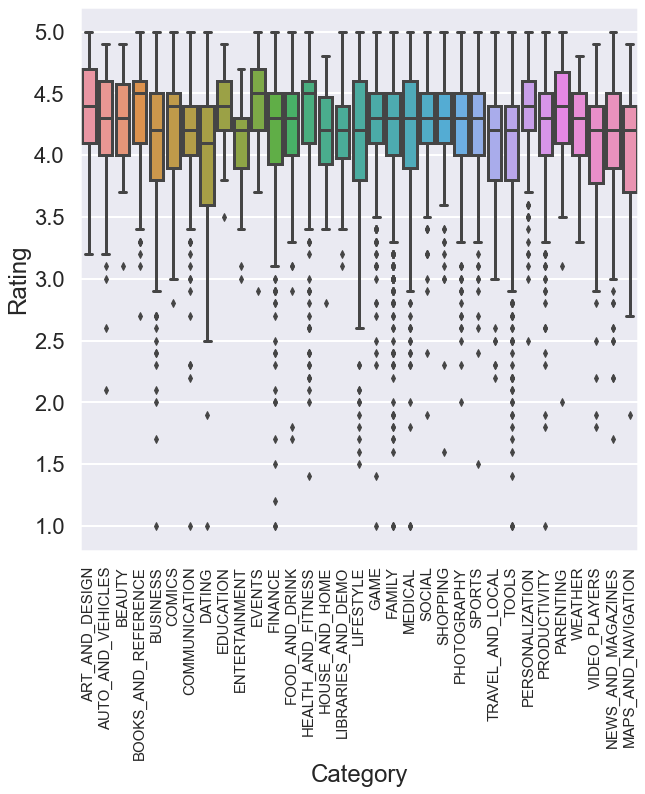

In [84]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Category",y="Rating",data=df)
plt.xticks(size=15,rotation=90)
plt.show()

#### Analysing which category are of largest size

In [85]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'day', 'month', 'year'],
      dtype='object')

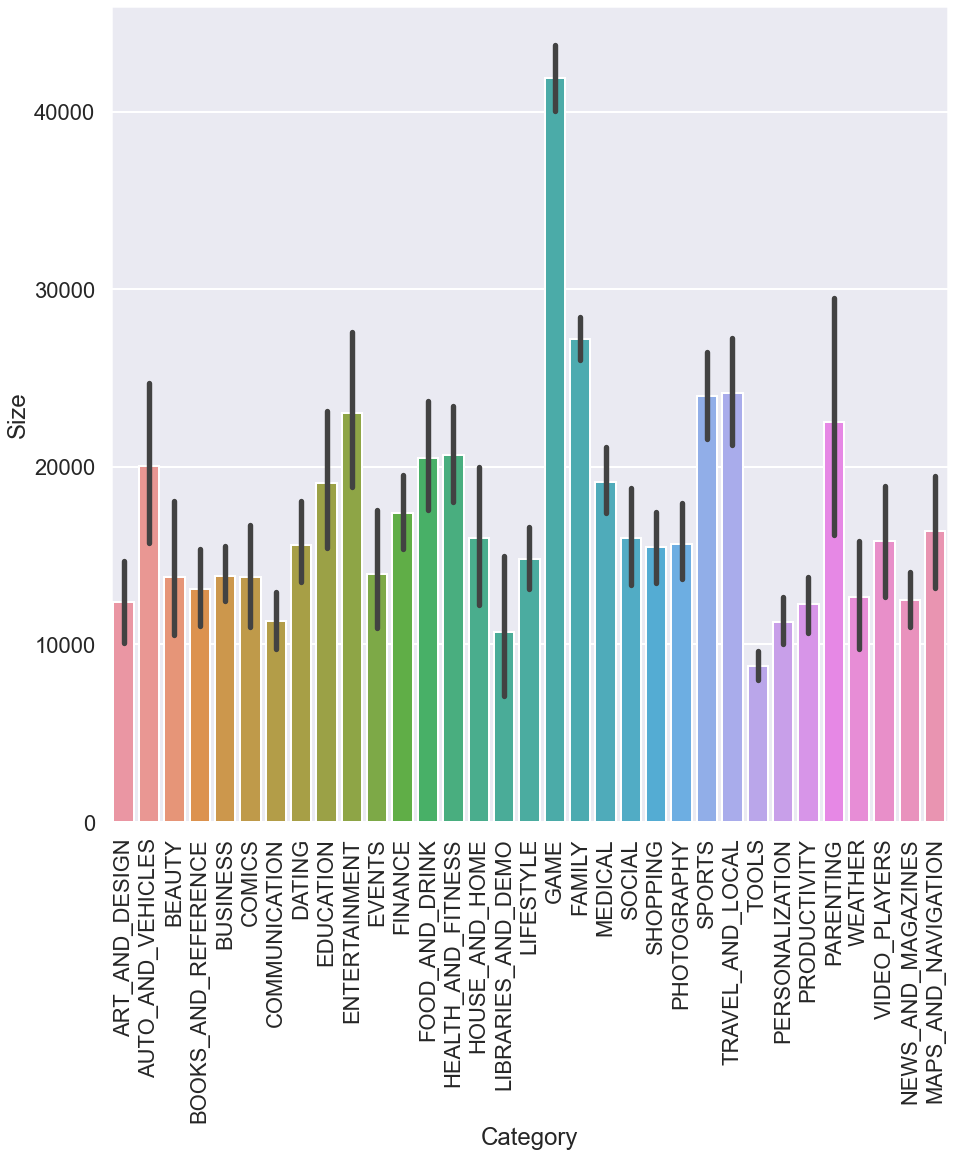

In [98]:
plt.figure(figsize=(15,15))
plt.xticks(rotation = 90)
sns.barplot('Category','Size',data=df)
plt.show()

Text(0.5, 1.0, 'Time series plot of Last Updates')

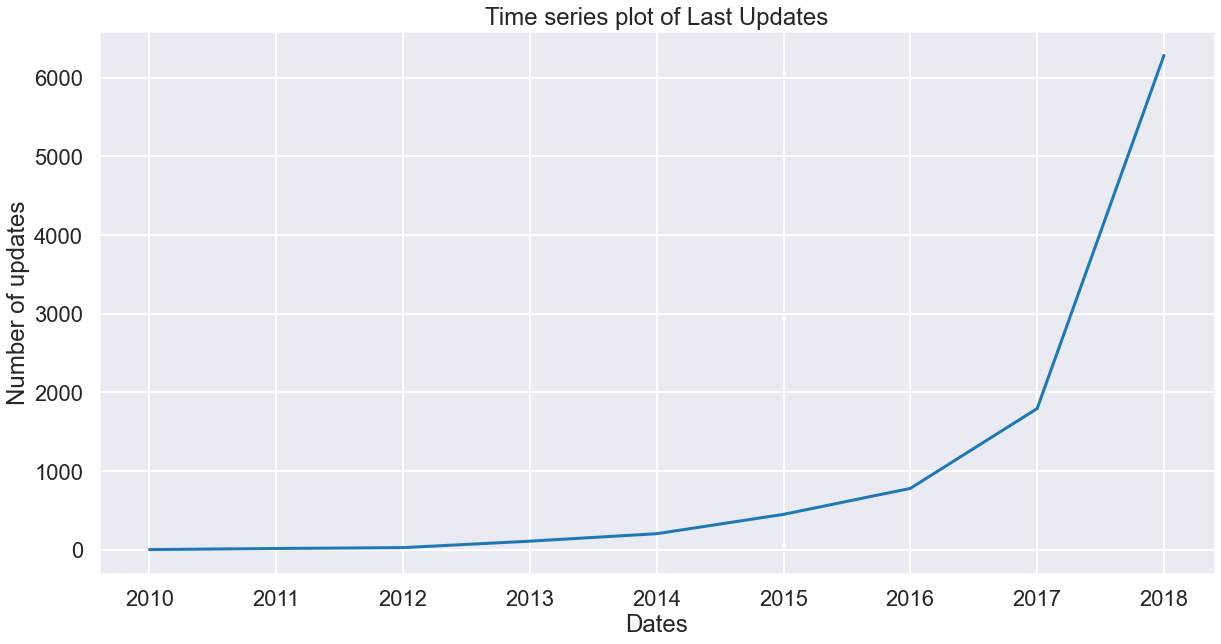

In [100]:
plt.subplots(figsize=(20,10))
freq= pd.Series()
freq=df['year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

##Observation:
After 2012, we can see increasing number of updates.

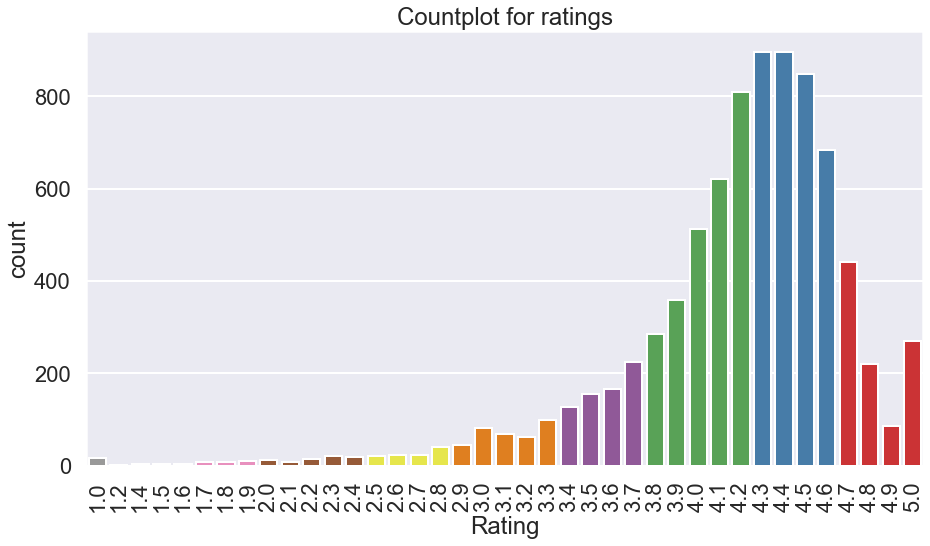

In [103]:
plt.figure(figsize=(15,8))
sns.countplot(x='Rating',data = df,palette="Set1_r")
plt.xticks(rotation =90)
plt.title('Countplot for ratings')
plt.show()

##Observation: Rating 4.3, 4.4 are given many time so far

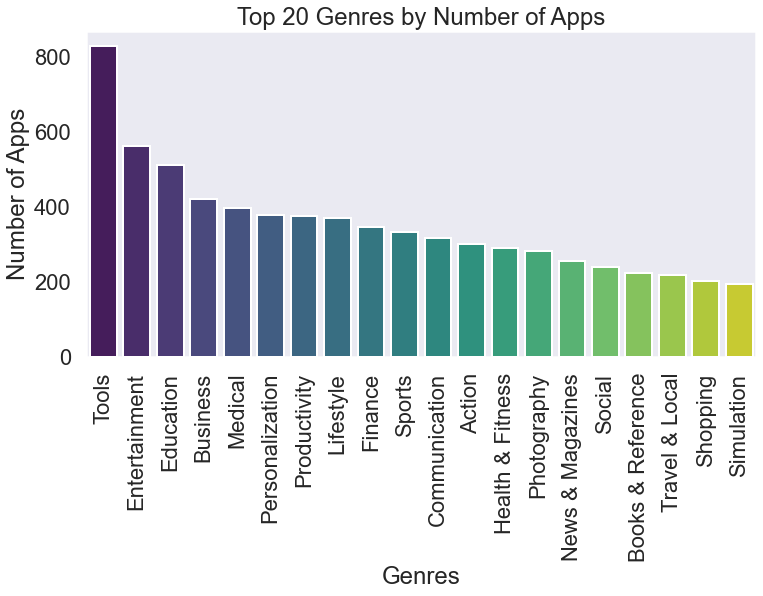

In [132]:
df_genres = df.groupby(['Genres']).size().reset_index(name='Number of Apps').sort_values(by='Number of Apps', ascending=False)

# Select the top 20 genres
top_genres = df_genres.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres, x='Genres', y='Number of Apps', palette='viridis')
plt.title('Top 20 Genres by Number of Apps')
plt.xlabel('Genres')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()